# **Introduction**

According to NASA's Earth Observatory [[1]](https://earthobservatory.nasa.gov/images/15136/fires-in-portugal), the second largest city in Portugal, Porto, experienced dozens of wildfires in July of 2005. These fires were attributed to months of drought which cased extreme fire danger. Several years later, Porto and surrounding areas continue to be susceptible to wildfires due to drought and deforestation. Between 2001 and 2022 alone, wildfires were responsible for 28% of the tree cover loss, (i.e., 12.2 kha) [[2]](https://www.globalforestwatch.org/dashboards/country/PRT/15/?category=fires). Other sources have shown that Coimbra, a city located near Porto, is also known for experiencing similar challenges [[3]](https://nhess.copernicus.org/articles/11/3343/2011/nhess-11-3343-2011.pdf)

Motivated by these occurrences, the first part of this task seeks to evaluate temperature, precipitation and tree loss cover patterns for Porto and Coimbra during the period 2000-2022. Specifically, this experiment analyses if there's any relationship between these variables, and whether there are notable spikes of temperature/precipitation values during the years notable wildfires and accentuated tree cover losses occurred.

Further, a similar approach is extended to the cities of Houghton MI, and Glasgow UK. Houghton and Glasgow were picked due to their status as cities with some of the most unpredictable weather conditions [[4]](https://fivethirtyeight.com/features/which-city-has-the-most-unpredictable-weather/#:~:text=After%20Rapid%20City%2C%20those%20with,Nebraska%3B%20and%20Glasgow%2C%20Montana.). However, instead of focusing on wildfires and loss of tree cover, the experiment focuses solely on temperature and precipitation.

# **Hypotheses**

This experiment evaluates the credibility of the following hypotheses:
*   For the period 2000-2010, the higher the yearly average temperature of Porto and Coimbra, the more tree cover was lost due to fires. Additionally, given their proximity, both cities experienced similar trends in this regard.
*   The monthly average temperature for 50 years (i.e., 1960 - 2010) in Coimbra, Glasgow, Houghton, and Porto increases as the monthly average precipitation levels increase.

Weather Data Source: [NOAA - National Centers for Environmental Information [5]](https://www.ncei.noaa.gov/cdo-web/review).
Porto Fires Data Source: [Global Forest Watch](https://www.globalforestwatch.org/dashboards/global/)



# **Preparing the Environment**

First, install and import all necessary packages and modules. \\
A supporting GIT repository is also brought into this workspace.

In [1]:
# install non-python libraries
!pip install cartopy

# install supporting modules
import sys
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
from IPython.display import clear_output
from scipy.stats import pearsonr
import scipy.stats as stats

# -------------------------------------------------------------------
# reset main directory to any previous downloads from git repository
!rm -rf '/content/data-analytics'

# -------------------------------------------------------------------
# clone git hub functions to support this assignment
!git clone https://github.com/jpilartescongo/data-analytics.git
sys.path.append('/content/data-analytics/')

# import my function
import myFunction as mf
clear_output()



---



# **First Hypothesis: Average Temperature in Coimbra and Porto and tree cover loss follow a positive relationship. Coimbra and Porto have similar trends in cover loss, temperature, and precipitation.**

Pandas is used to import the files into this workspace. Since pandas is also available from myFunction, there's no need to import it again in this workspace.

In [3]:
# read data pertinent to porto and coimbra for the years 2000-2022
# tree cover information was available for the period 2001-2022
# yearly temp/precip data was available for 2000-2009

# read datasets (porto and coimbra data)
fire_data = mf.pd.read_csv('/content/data-analytics/a2_fires_and_weather.csv')
weather_only = mf.pd.read_csv('/content/data-analytics/a2_fires_only.csv')
merged_data = mf.pd.read_csv('/content/data-analytics/a2_2000_to_2009_merged.csv')
fire_only = mf.pd.read_csv('/content/data-analytics/a2_fires_only.csv')

Initial analyses were based on frequency distribution for the period 2001-2022 for both general loss, and loss due to fires. The plot suggests a presence of some high values (i.e., outliers) associated with years of accentuated cover loss. The loss for the entire study period was 2339.03 hectares (ha), and the mean loss due to fires was 504.88 ha.

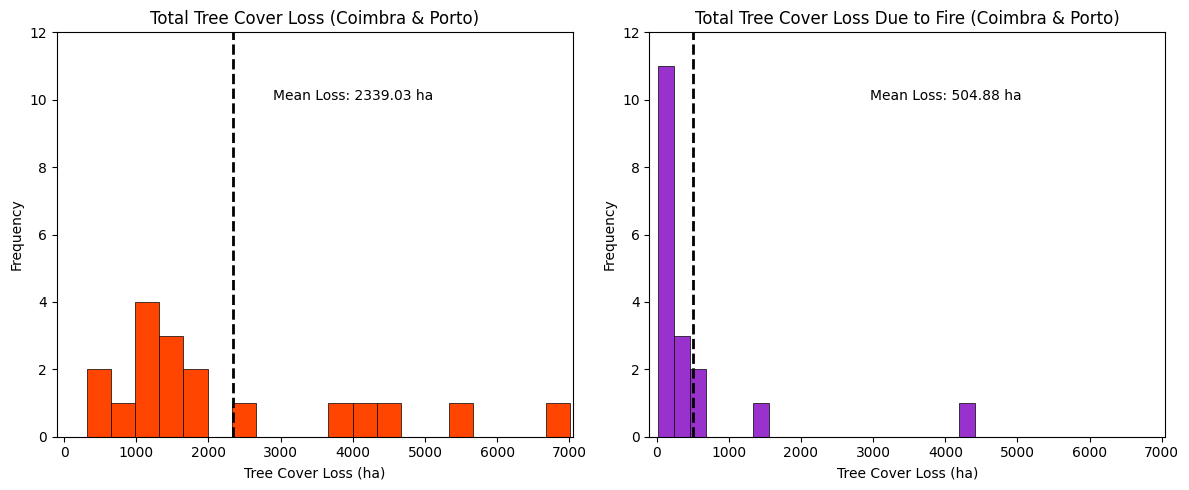

In [4]:
# filter out weather data years: 2000 - 2009
weather_only = fire_data[(fire_data['YEAR']>1999) & (fire_data['YEAR']<2010)]
weather_porto = weather_only[(fire_data['NAME']=='PORTO')]
weather_coimbra = weather_only[(fire_data['NAME']=='COIMBRA')]

# filter out fire data years: 2001-2022
fire_only = fire_data[(fire_data['YEAR']>2000)]
fire_porto = fire_only[(fire_data['NAME']=='PORTO')]
fire_coimbra = fire_only[(fire_data['NAME']=='COIMBRA')]
clear_output()

# -----------------------------------------------------------------------
# call fire plot histograms function that needs the following parameters:
# dataset, attribute 1, attribute 2, title 1, title 2
# the result is a 1x2 figure with 2 subfigures
var1, var2 = 'LOSS_HA', 'LOSS_FIRES_HA'
title1 = 'Total Tree Cover Loss (Coimbra & Porto)'
title2 = 'Total Tree Cover Loss Due to Fire (Coimbra & Porto)'
mf.create_fire_hist2(merged_data, var1, var2, title1, title2)

The plot below shows that between 2001 and 2022, the highest amounts of tree cover loss attributed to fires in Coimbra occurred in 2017 and 2018, accounting for 62.81% and 14.85% of total losses, respectively. In Porto, 2013 and 2016 recorded the highest percentages, with values of 14.77% and 17.82% of the total loss, respectively. These records also suggest that despite Coimbra experiencing the highest ever recorded loss in a single year, Porto has historically experienced more events of significant tree cover loss due to fire.

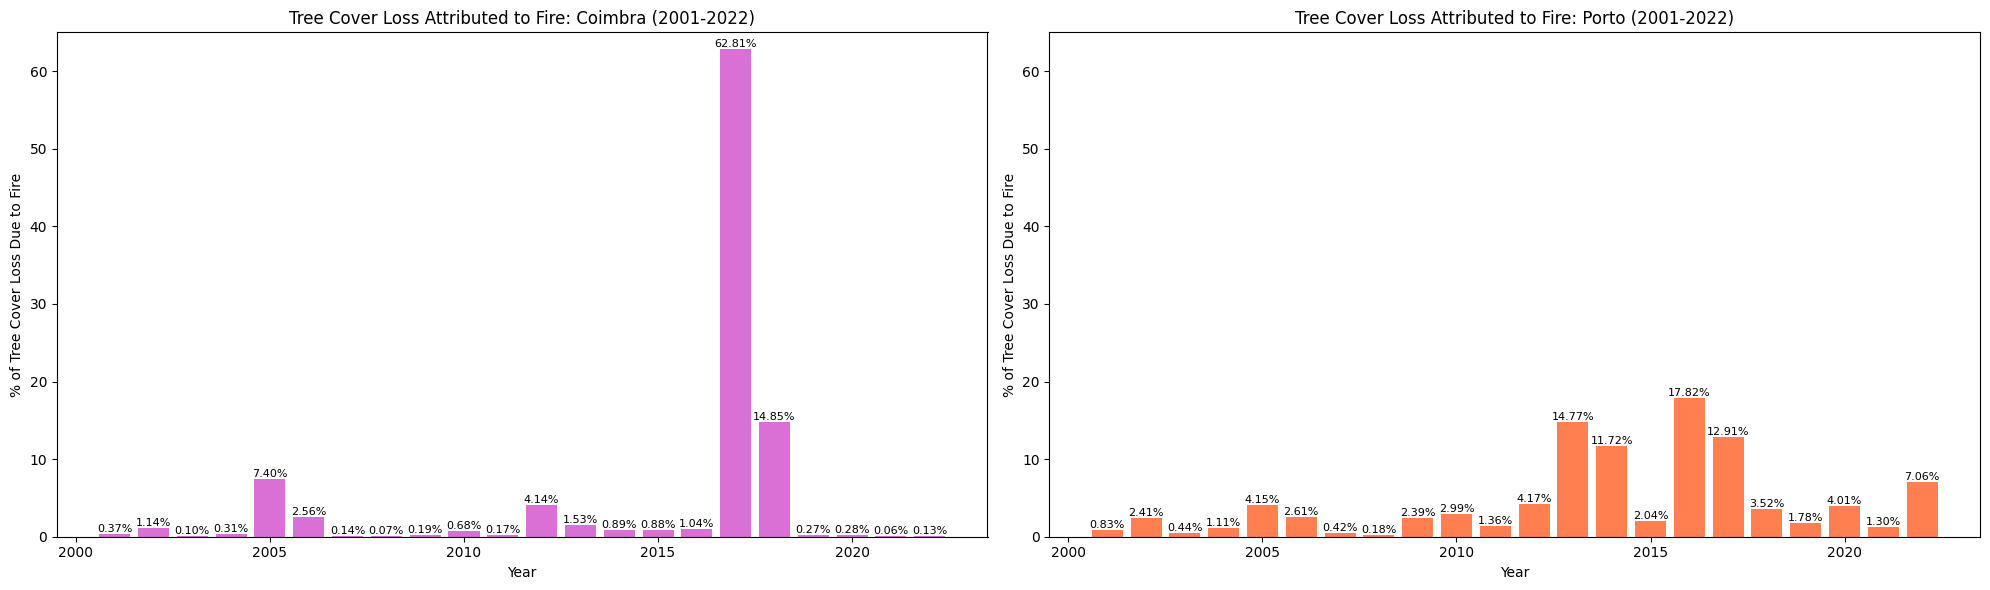

In [5]:
# add column that calculates the percentage of total tree cover loss
# attributed to the loss due to fires for each of the cities
porto_cum_sum = fire_only['LOSS_FIRES_HA'][:22].cumsum()
coimbra_cum_sum = fire_only['LOSS_FIRES_HA'][22:].cumsum()
porto_sum, coimbra_sum = porto_cum_sum.iloc[-1], coimbra_cum_sum.iloc[-1]

fire_only['PERCENT'] = np.nan
fire_only.loc[:23, 'PERCENT'] = (fire_only['LOSS_FIRES_HA'][:22] / porto_sum) * 100
fire_only.loc[23:, 'PERCENT'] = (fire_only['LOSS_FIRES_HA'][22:] / coimbra_sum) * 100
clear_output()

# -----------------------------------------------------------------------
# call function that creates a plot displaying the percetnage of total tree
# cover loss attributed to the loss due to fires for each of the cities
title1 = 'Tree Cover Loss Attributed to Fire: Coimbra (2001-2022)'
title2 = 'Tree Cover Loss Attributed to Fire: Porto (2001-2022)'
mf.loss_percent(fire_only, title1, title2)

The next figure shows a regression line and trend analysis of the total tree cover loss (i.e., general and due to fires) for 2001-2022. The plots suggest a direct relationship between total tree cover loss and loss due to fire. The yearly distribution shows the overall highlights the first major fire event, 2005, which was the basis for this hypothesis testing. It shows a significant peak in 2017 that corresponds to the most extreme tree cover loss observed in the study period.

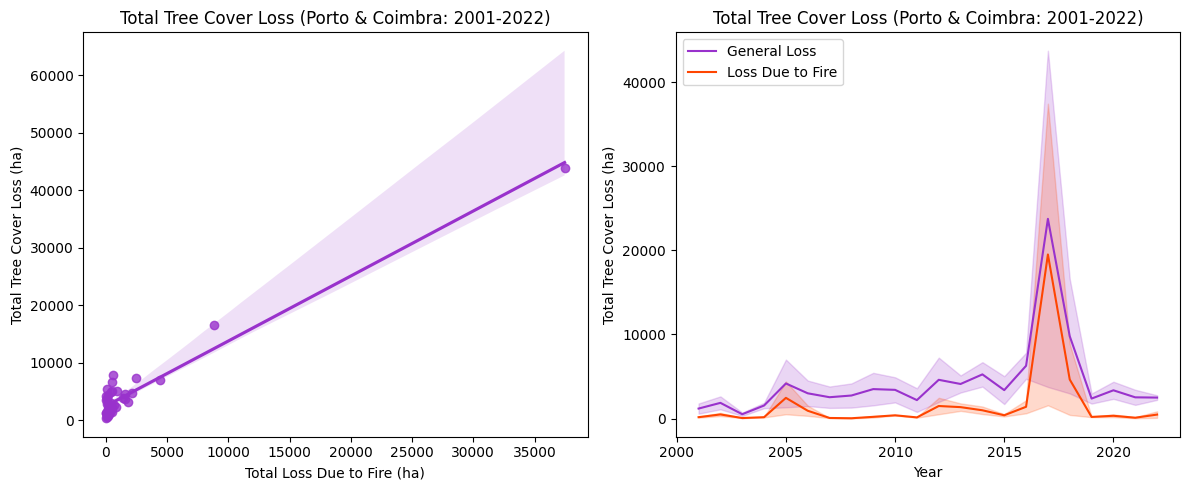

In [6]:
# create a regression line and trend analysis plots for total tree loss in coimbra and
# porto (general and due to fire) for coimbra and porto for the period 2001-2022.
# the figure has 2 subplots in 1x2 dimensions

# set figure properties, title, and variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
title = 'Total Tree Cover Loss (Porto & Coimbra: 2001-2022)'
year_attr, fire_attr1, fire_attr2 = 'YEAR', 'LOSS_HA', 'LOSS_FIRES_HA'

# set colors and other display properties
colors = ['darkorchid', 'orangered']
x_label = ['Total Loss Due to Fire (ha)', 'Year']
y_label = 'Total Tree Cover Loss (ha)'

# scatter plot with regression line
sns.regplot(x=fire_attr2, y=fire_attr1, data=fire_only, color=colors[0], ax=axes[0])
axes[0].set_title(title)
axes[0].set_xlabel(x_label[0])
axes[0].set_ylabel(y_label)

# line plot for general loss and loss due to fire
sns.lineplot(x=year_attr, y=fire_attr1, data=fire_only, label='General Loss', color=colors[0], ax=axes[1])
sns.lineplot(x=year_attr, y=fire_attr2, data=fire_only, label='Loss Due to Fire', color=colors[1], ax=axes[1])
axes[1].set_title(title)
axes[1].set_xlabel(x_label[1])
axes[1].set_ylabel(y_label)
axes[1].legend(loc='upper left')

# adjust layout before display
plt.tight_layout()

Next, we compare the amount of tree cover loss and the amount of loss due to fire. Again, the figure shows that Porto significantly higher amounts of tree cover loss, thereby supporting the earlier claims. The loss not attributed to wildfires may have occurred due to reasons such as drough, deforestation for urbanization.

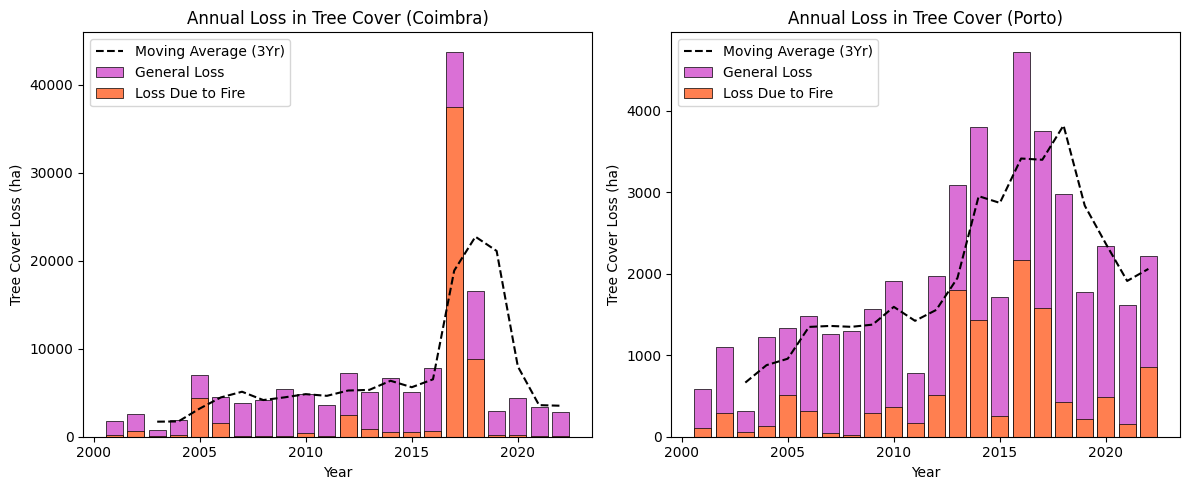

In [7]:
# call function to plot 1x2 bar (2 cities) charts with a 3 year moving
# average using the following parameters: city1, city2
title1, title2 = 'Annual Loss in Tree Cover (Coimbra)', 'Annual Loss in Tree Cover (Porto)'
xlabel, ylabel = 'Year', 'Tree Cover Loss (ha)'
mf.create_bar_charts2(fire_coimbra, fire_porto, title1, title2, xlabel, ylabel)

The next figure highlights the discrepancy of data distrubtion for both sites over the years. Observe the higher range of data points for 2005, 2016, and 2018, all corresponding to years of notable fire activity.

Text(0.5, 1.0, 'Distribution of Tree Cover Loss Due to Fire Data Points: Coimbra & Porto (2001-2022)')

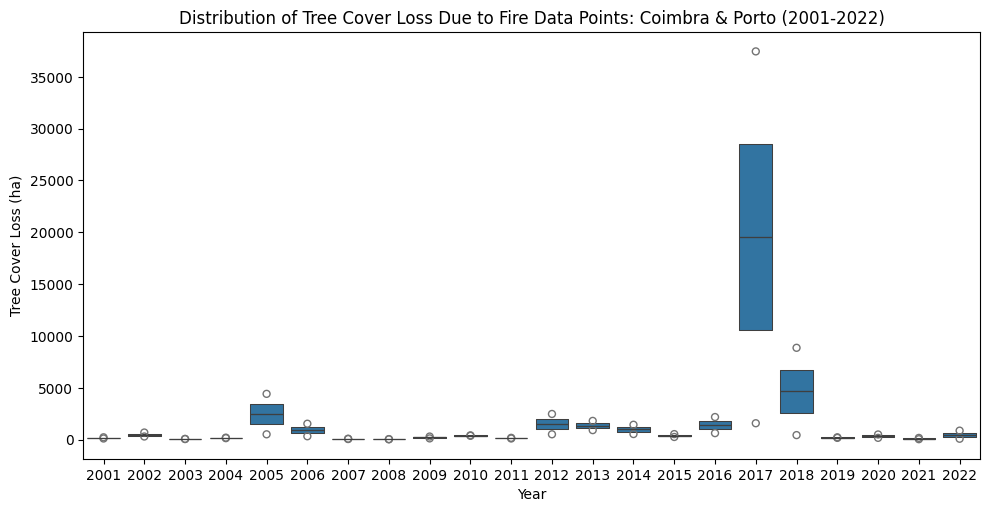

In [ ]:
# create a boxplot showing the distrubtion of tree cover lsos due to
# fire data points for coimbra and porto (2001 - 2022)
plt.figure(figsize=(10, 5))
sns.boxenplot(x=fire_only['YEAR'], y=fire_only['LOSS_FIRES_HA'])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.tight_layout()
plt.title('Distribution of Tree Cover Loss Due to Fire Data Points: Coimbra & Porto (2001-2022)')

The next two figures describe the relationship between average temperature, total precipitation, and loss of tree cover in annual temporal resolution for the period 2001-2009. Results show no clear relationship between the three variables, thus negating the hypotheses that more trees are lost as temperatures increase. However, some evidence is shown that highlights certain spikes in temperature may lead to more loss due to fire. Analyses using the Pearson metric suggested that no statistically significant correlation exists between these variables. the Pearson coefficients for temperature were 0.25 and 0.33 for Coimbra and Porto, respectively. Temperature yielded coefficients of -0.33 and -0.14 for the two cities. Thus, this suggests that other factors should be evaluated to understand the reasons behind wildfires instead of just temperature and precipitation. It must be emphasized that this analysis was limited by the fact that fire information and temperature information from the sources utilized only intersected in 2001-2009.

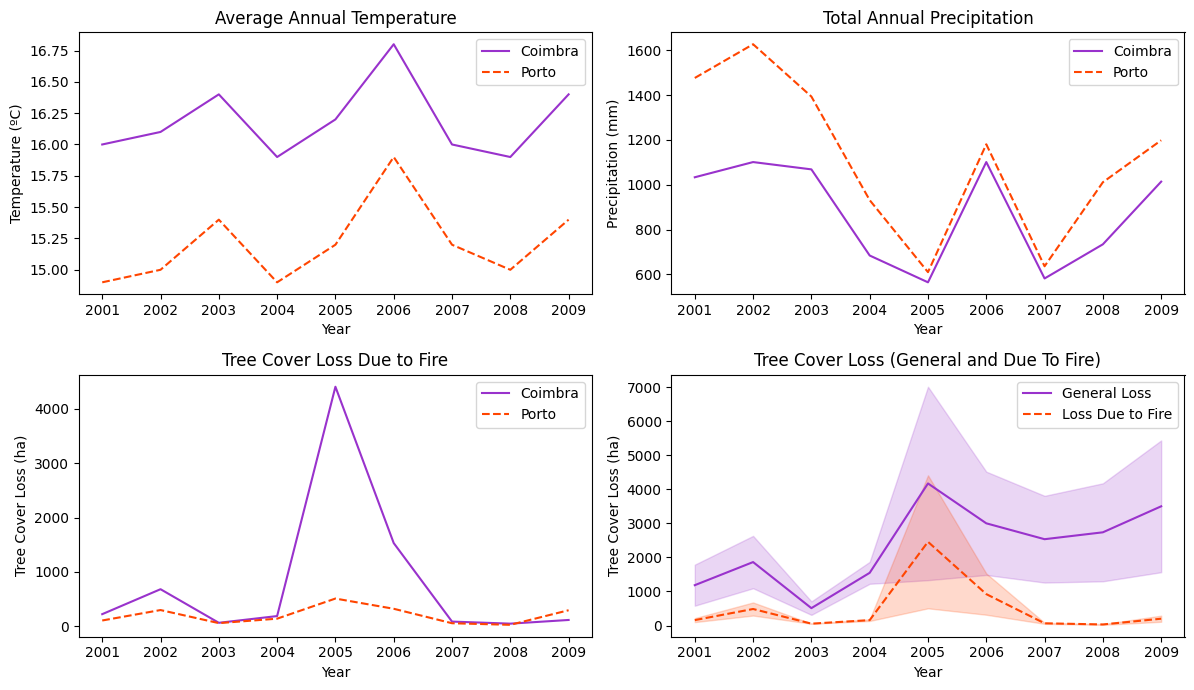

In [ ]:
# create a series of plots that show the relationship between temperature, precipitation
# and tree cover loss (general and due to fire) for both coimbra and porto by first
# splitting the data into two different variables that represent each city
coimbra_merged = merged_data[merged_data['NAME'] == 'COIMBRA']
porto_merged = merged_data[merged_data['NAME'] == 'PORTO']

# call function to generate 2x2 subplots
# parameters: city1, city2, entire dataset
mf.create_port_plots4(coimbra_merged, porto_merged, merged_data)

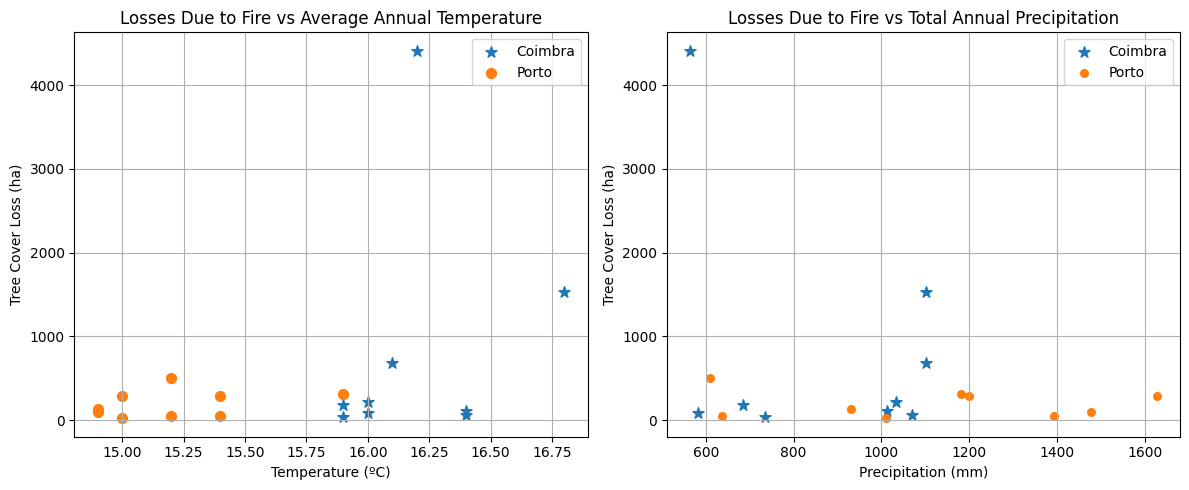

Temperature:
Coimbra: Pearson Correlation Coefficient: 0.2453340342876245, p-value: 0.5246036820557841
Porto: Pearson Correlation Coefficient: 0.3260511884695192, p-value: 0.39183944767350526

Precipitation:
Coimbra: Pearson Correlation Coefficient: -0.33400530240284143, p-value: 0.3796940641181732
Porto: Pearson Correlation Coefficient: -0.14156166815022228, p-value: 0.7163856048292379


In [ ]:
# -------------------------------------------------------------------------
# call function that plots relationship between variables and provides
# statemenet about the significance of the test
title = ['Losses Due to Fire vs Average Annual Temperature',
         'Losses Due to Fire vs Total Annual Precipitation']
confidence = 0.05
mf.temp_precip_corr(title, confidence, coimbra_merged, porto_merged)

The figure below shows relatively stable temperature trends for both Coimbra and Porto during 2001-2009. This lack of temperature variation partially explains why temperature alone is not enough to conclude that wildfires are caused by increasing average temperatures. Precipitation is slightly more variable, and there may be some interest in evaluating it closely given that the highest wildfire of the period 2001-2009 occurred in the year that received the least total precipitation, 2005.

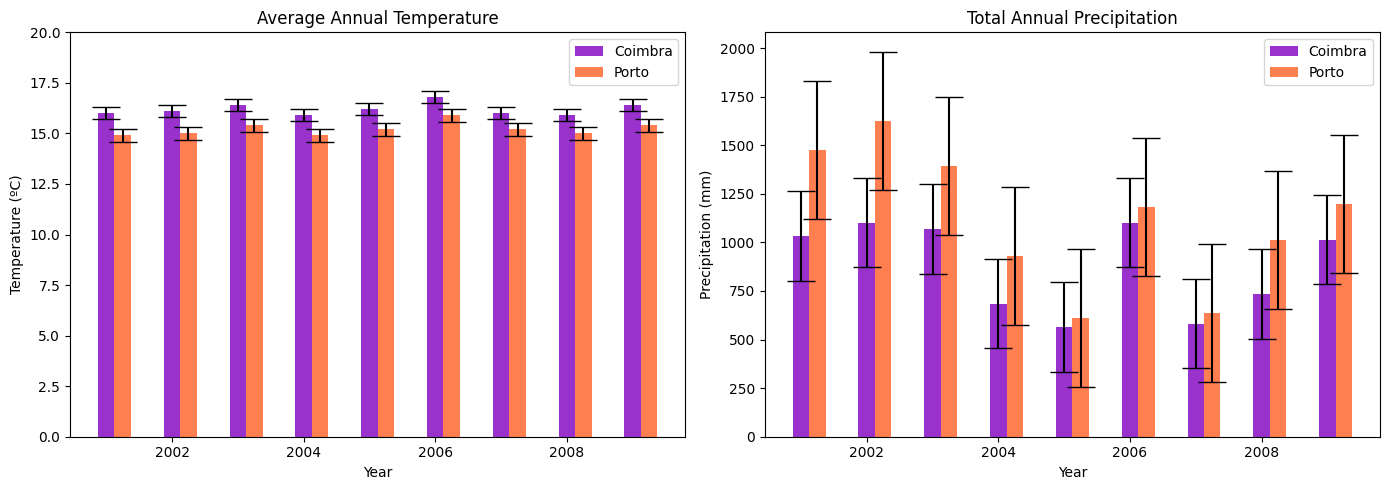

In [ ]:
# call function that creates a 1x2 plot that shows the differences in temperature
# and precipitation for porto and coimbra, using the city 1 and city 2 data
mf.create_weather_comparison(coimbra_merged, porto_merged)



---



# **Hypothesis: The monthly average temperature for 50 years (i.e., 1960-2010) in Coimbra, Glasgow, Houghton, and Porto increases with the monthly average precipitation levels.**

Pandas is used again to import the files into this workspace. Since pandas is also available from myFunction, there's no need to import it again in this workspace. Here we also tweak the time to a more manageable format and we add two additional columns (year and month) to the dataset in ways to facilitate filtering of data where applicable. Finally, the data is split and storing into different variables according to the location being evaluated.

In [2]:
# read station data
stations = mf.pd.read_csv('/content/data-analytics/a2_stations.csv')

# convert stations dates to datetime
stations['DATE'] = mf.pd.to_datetime(stations['DATE'], format="%Y/%m/%d")

# add new columns with year, month, and city name information to the table
stations['YEAR'] = stations['DATE'].dt.year
stations['MONTH'] = stations['DATE'].dt.strftime('%B')

# call function to create column with city names
mf.create_city_col(stations)

# split station data into various locations
cctx = mf.indiv_station(stations, 'CORPUS')
coimbra = mf.indiv_station(stations, 'COIMBRA')
glasgow = mf.indiv_station(stations, 'PAISLEY')
houghton = mf.indiv_station(stations, 'HANCOCK HOUGHTON')
porto = mf.indiv_station(stations, 'PORTO')

Next, a series of tests and plots are conducted/generated to evaluate the accuracy of hypothesis #2. Preliminary analysis plotted the data point distribution for temperature and precipitation for each of the cities. The violin plots in Figure 25 show that temperature data points ranged between -15ºC and 30ºC. Houghton recorded both the lowest temperature (-15ºC) and the highest range (-15ºC to 30ºC). Corpus Christi recorded the highest values (30ºC). Total monthly precipitation values ranged up to approximately 700 mm, with Porto seeing the widest data point range (i.e., up to 7002 mm) and Houghton the least (up to 300 mm).

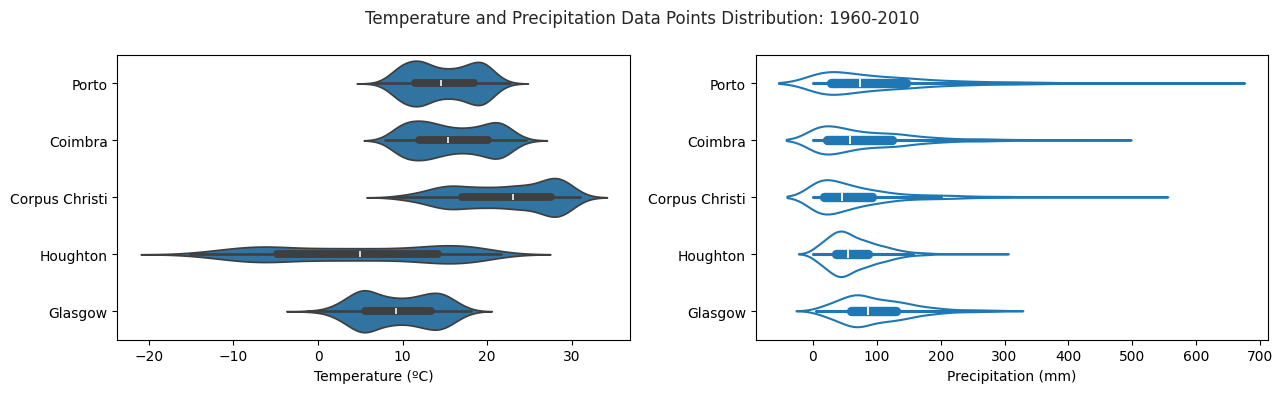

In [ ]:
# create violin plots with data distribution for temperature
# and precipitation data points for all cities

fig, axes = plt.subplots(1, 2, figsize=(13, 4))
sns.set_theme()

# temperature violin plots
sns.violinplot(data=stations, x='TAVG', y='CITY_NAME', orient='h', fill=True, ax=axes[0])
axes[0].set_xlabel('Temperature (ºC)')
axes[0].set_ylabel('')

# precipitation violin plots
sns.violinplot(data=stations, x='PRCP', y='CITY_NAME', orient='h', fill=False, ax=axes[1])
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('')

# titles and display
plt.suptitle('Temperature and Precipitation Data Points Distribution: 1960-2010', size=12)
plt.tight_layout()

Histograms suggested temperature datasets that are not normally distributed, most resembling char-acteristics of bimodal data points. Precipitation was also not normally distributed, despite some lo-cations resembling characteristics similar to normally distributed data (e.g., Glasgow, Houghton). The mean of temperature and precipitation data points were as follows: Coimbra (15.82ºC, 80.05 mm), Corpus Christi (22.16ºC, 67.11 mm), Glasgow (9.32ºC, 98.60 mm), Houghton (4.67ºC, 63.47 mm), and Porto (14.81ºC, 101.20 mm). Observe that Houghton has both the smallest average tem-perature and the smallest average of total precipitation.

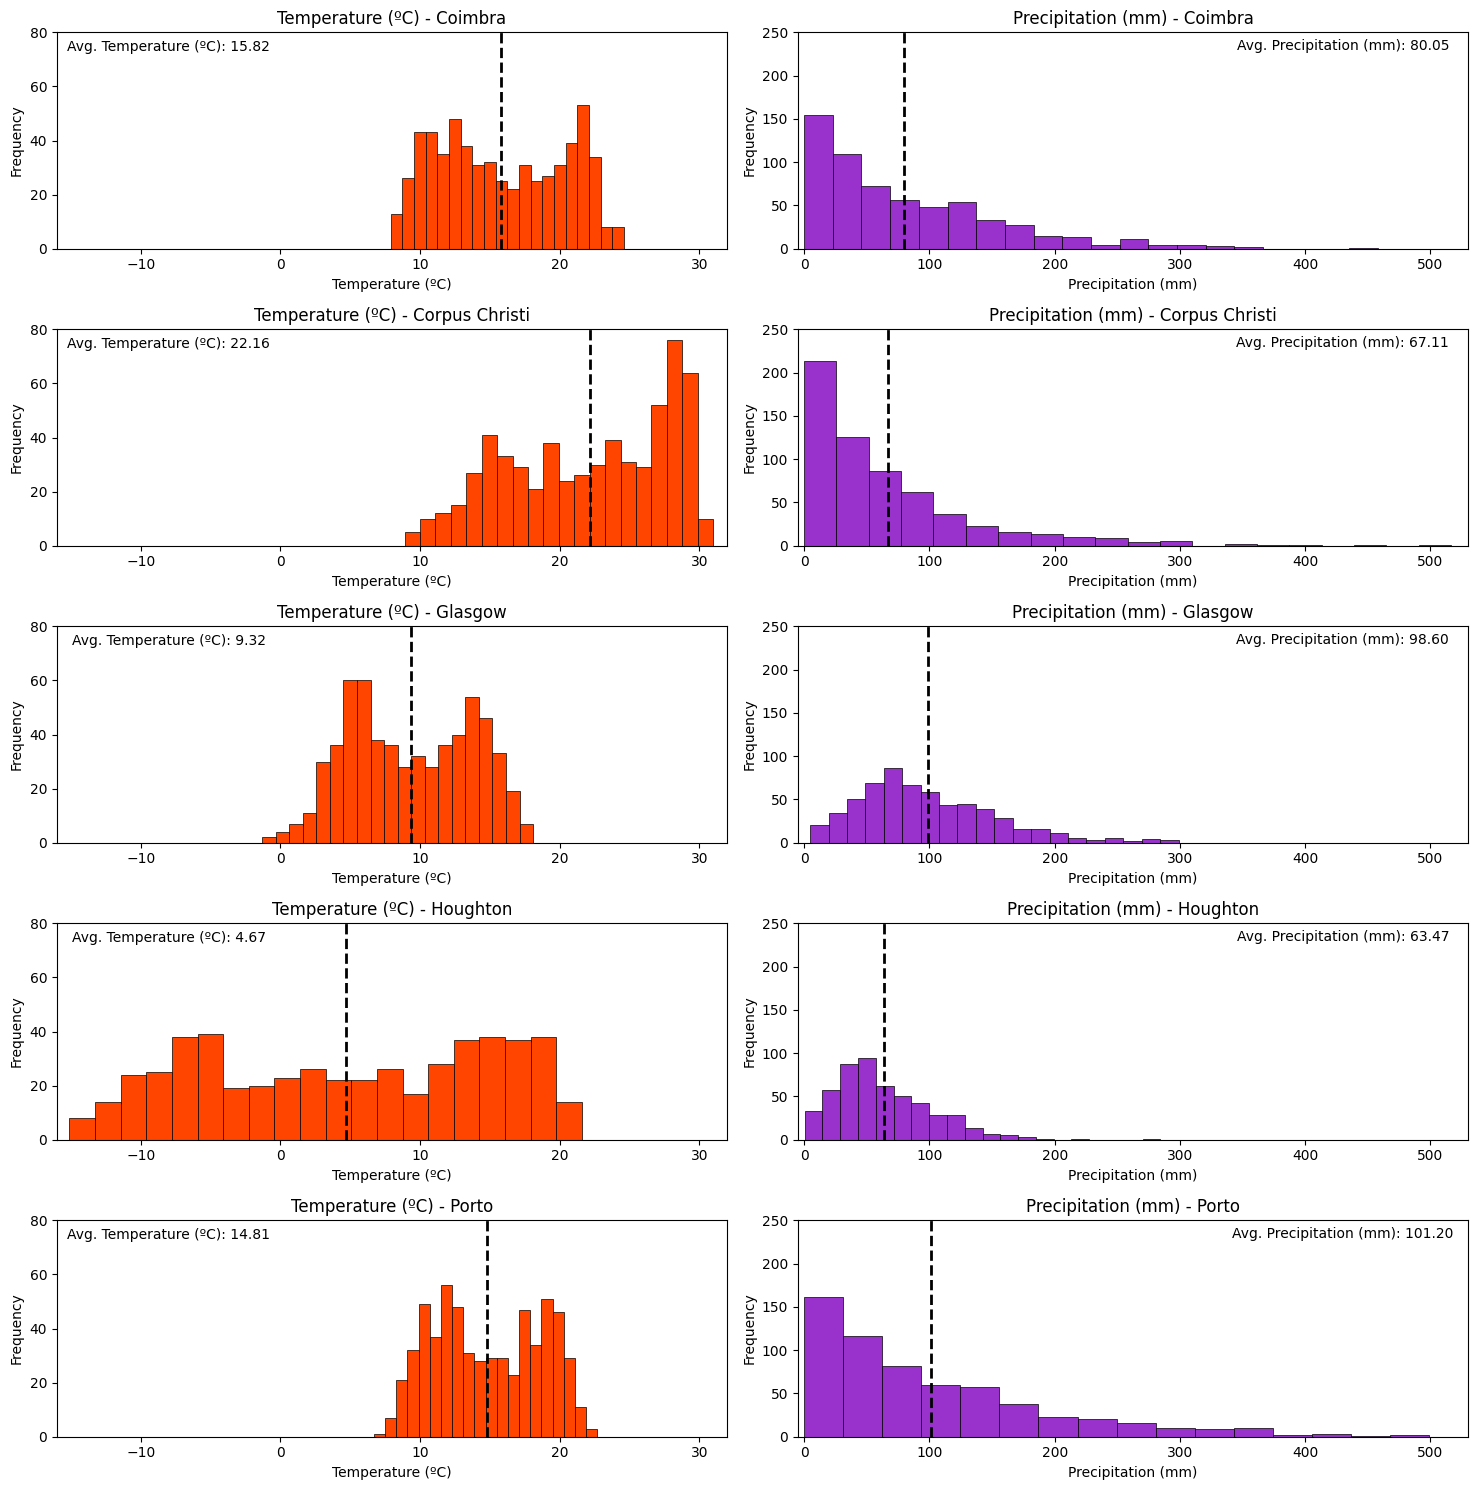

In [9]:
# call function that plots 10 histograms showing temperature and precipitation
# takes 4 arguments: dataset array, colors array, x labels array, and y label
dataset = [coimbra, cctx, glasgow, houghton, porto]
colors = ['orangered', 'darkorchid']
x_axis = ['Temperature (ºC)', 'Precipitation (mm)']
y_axis = 'Frequency'

mf.create_hist10(dataset, colors, x_axis, y_axis)

The next step consisted of plotting the precipitation and temperature on the same axis to evaluate potential trends. This was done using both the original data, and corrections based on the seasonal auto-regressive integrated moving average (SARIMA) technique. SARIMA is a model that helps to evaluate time-series data without the negative influences of seasonality. Results are shown below. The resulting plots are inconclusive as there does not appear to exist a positive or negative rela-tionship between the variables.

/content/data-analytics/myFunction.py:459: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  temp_line1, = ax2.plot(data['DATE'], data['TAVG'], 'k--', linewidth=1.0, label=fig10_labels[1], color='black')
/content/data-analytics/myFunction.py:460: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  temp_line2, = ax4.plot(data['DATE'], data['TAVG_SARIMA'], 'k--', linewidth=1.0, label=fig10_labels[1], color='black')


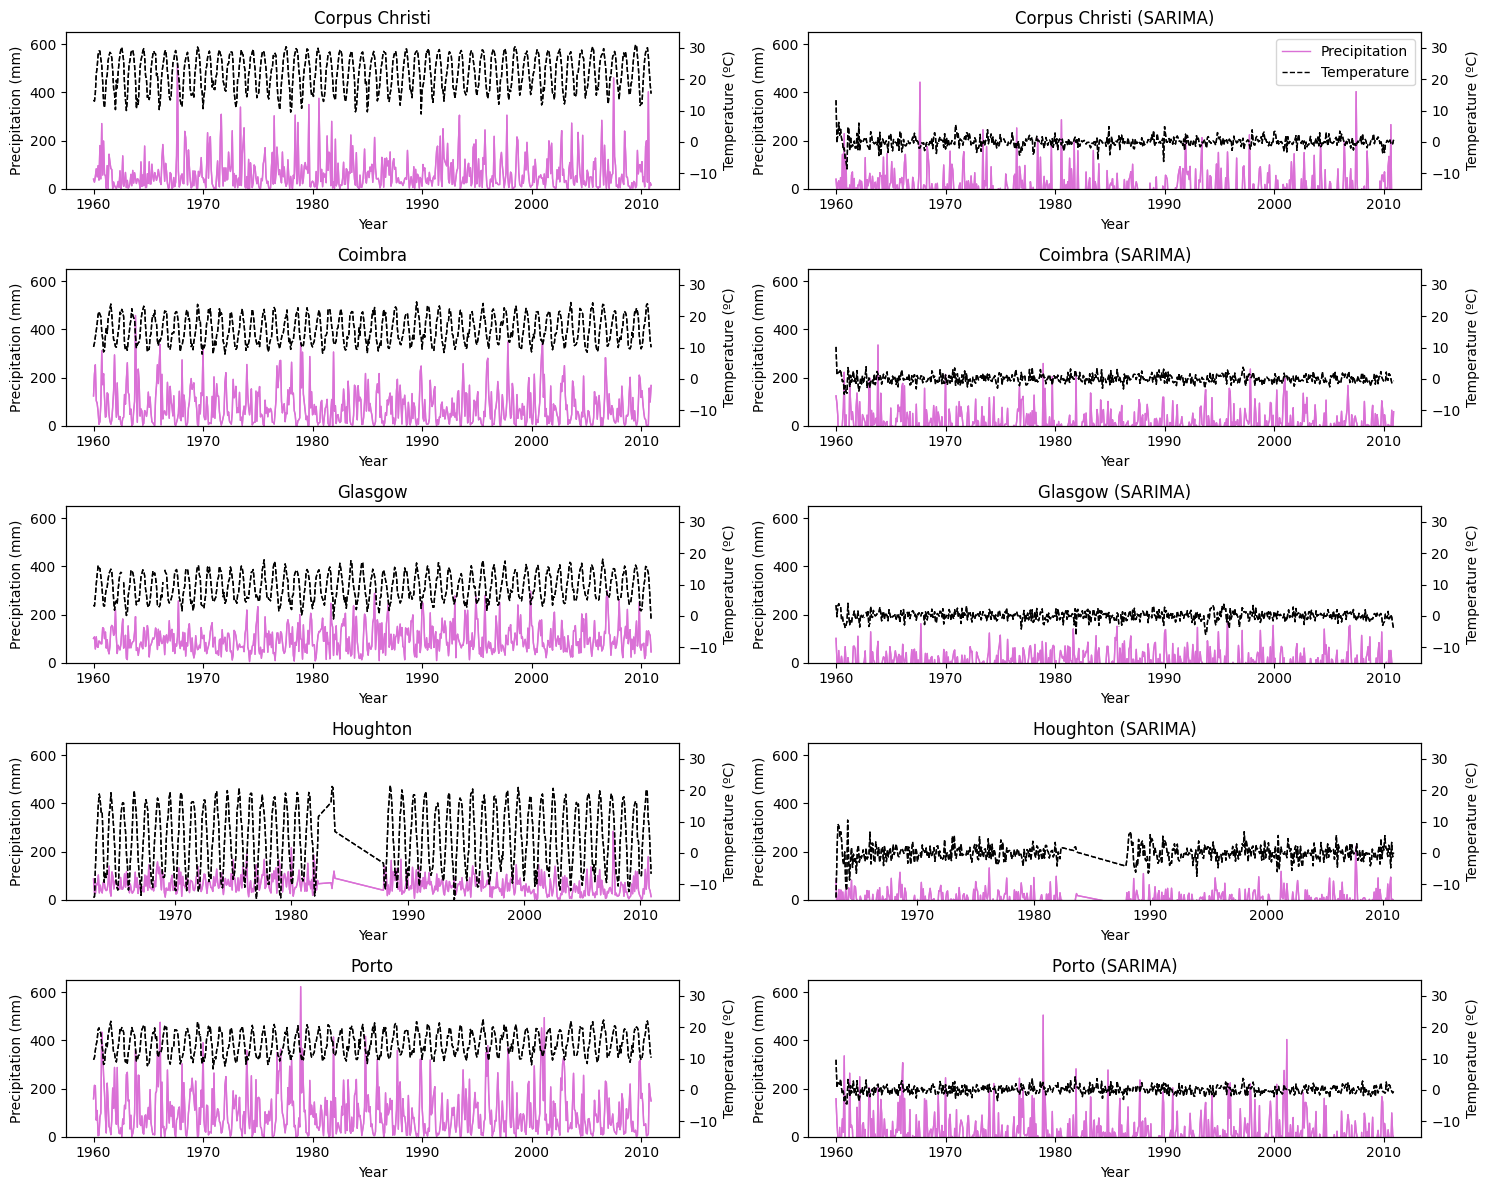

In [11]:
# call sarima function to remove seasonality of # temeprature/precipitation for
# each location takes record/dataset and column of interest as input parameters
for record in [cctx, coimbra, glasgow, houghton, porto]:
  temp_col = 'TAVG'
  record = mf.sarima(record, temp_col)

for record in [cctx, coimbra, glasgow, houghton, porto]:
  precip_col = 'PRCP'
  record = mf.sarima(record, precip_col)
clear_output()

# -----------------------------------------------------------------------------
# call function that creates trend relationship for temp and precip
# for all cities: first plots them in their original form, then
# plots them taking sarima tweaks into account
locations =[cctx, coimbra, glasgow, houghton, porto]
mf.create_trends10(locations)

Plot of maximum/minimum temperature for all data points also suggests a dataset that is not made of normally distributed points. The mean maximum temperature was 18ºC and the minimum mean temperature was 9.07ºC across all cities.

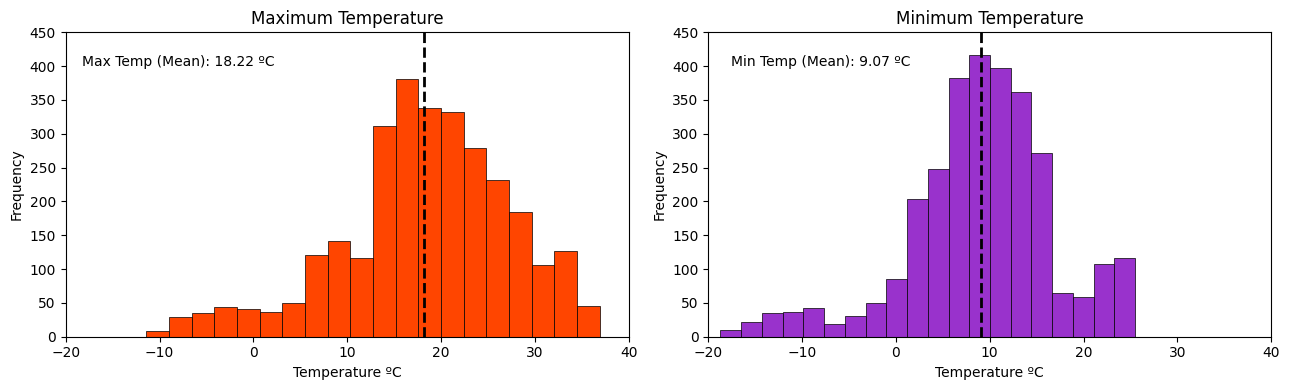

In [12]:
# for data plotting purposes, create histograms with the distribution
# of max/min temperature values for all five cities

fig, axs = plt.subplots(1, 2, figsize=(13, 4))
hist_x_lim = (-20, 40)
hist_y_lim = (0, 450)
mean_label_x = -8
mean_label_y = 400

mean_value1 = stations['TMAX'].mean()
stations['TMAX'].plot(kind='hist', bins=20, ax=axs[0], color='orangered', edgecolor='black', linewidth=0.5)
axs[0].set_title('Maximum Temperature')
axs[0].spines[['top', 'right']].set_visible(True)
axs[0].set_xlabel('Temperature ºC')
axs[0].set_ylabel('Frequency')
axs[0].axvline(mean_value1, color='black', linestyle='dashed', linewidth=2, label='Mean')
axs[0].set_xlim(hist_x_lim)
axs[0].set_ylim(hist_y_lim)
axs[0].text(mean_label_x, mean_label_y, f'Max Temp (Mean): {mean_value1:.2f} ºC', ha='center')

mean_value2 = stations['TMIN'].mean()
stations['TMIN'].plot(kind='hist', bins=20, ax=axs[1], color='darkorchid', edgecolor='black', linewidth=0.5)
axs[1].set_title('Minimum Temperature')
axs[1].spines[['top', 'right']].set_visible(True)
axs[1].set_xlabel('Temperature ºC')
axs[1].set_ylabel('Frequency')
axs[1].axvline(mean_value2, color='black', linestyle='dashed', linewidth=2, label='Mean')
axs[1].set_xlim(hist_x_lim)
axs[1].set_ylim(hist_y_lim)
axs[1].text(mean_label_x, mean_label_y, f'Min Temp (Mean): {mean_value2:.2f} ºC', ha='center')

plt.tight_layout()
plt.show()

Scatter plot distributions show the weak negative trend with Coimbra, Glasgow, and Porto. It is much easier to see the negative trend in Coimbra and Porto, which is consistent with Pearson's statistics results obtained elsewhere.

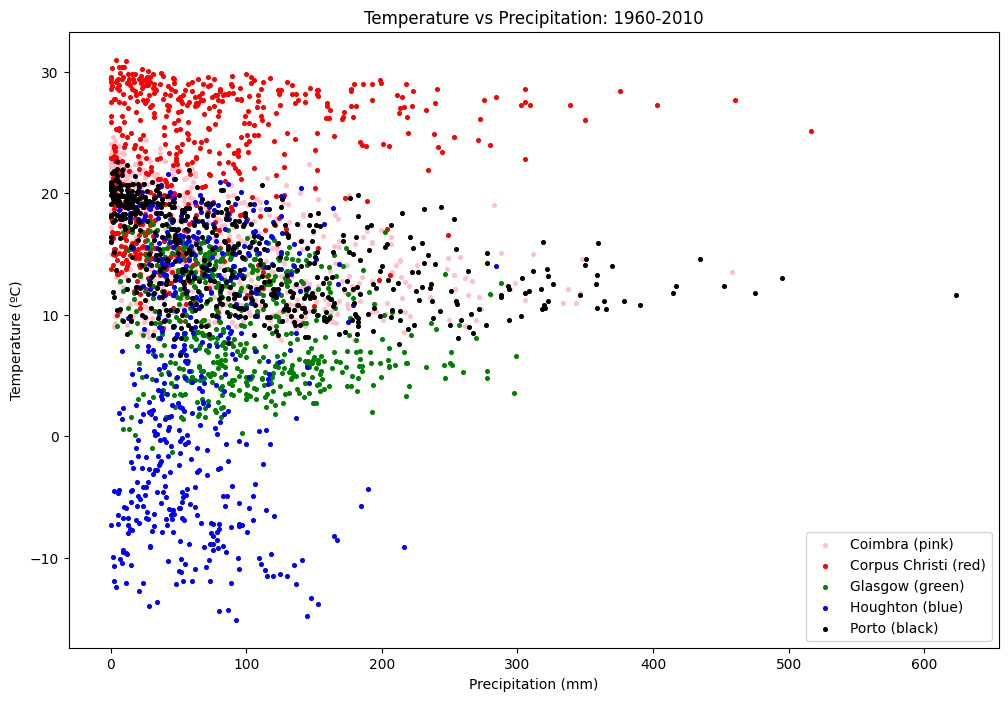

In [13]:
# create a scatter plot with temperature and precipitation data points
fig, ax = plt.subplots(figsize=(12, 8))

ax.scatter(coimbra['PRCP'], coimbra['TAVG'], s=7, label='Coimbra (pink)', c='pink')
ax.scatter(cctx['PRCP'], cctx['TAVG'], s=7, label='Corpus Christi (red)', c='red')
ax.scatter(glasgow['PRCP'], glasgow['TAVG'], c='green', s=7, label='Glasgow (green)')
ax.scatter(houghton['PRCP'], houghton['TAVG'], c='blue', s=7, label='Houghton (blue)')
ax.scatter(porto['PRCP'], porto['TAVG'], c='black', s=7, label='Porto (black)')

# set legend, title, axes, and display plot
ax.set_title('Temperature vs Precipitation: 1960-2010')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('Temperature (ºC)')
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('white')

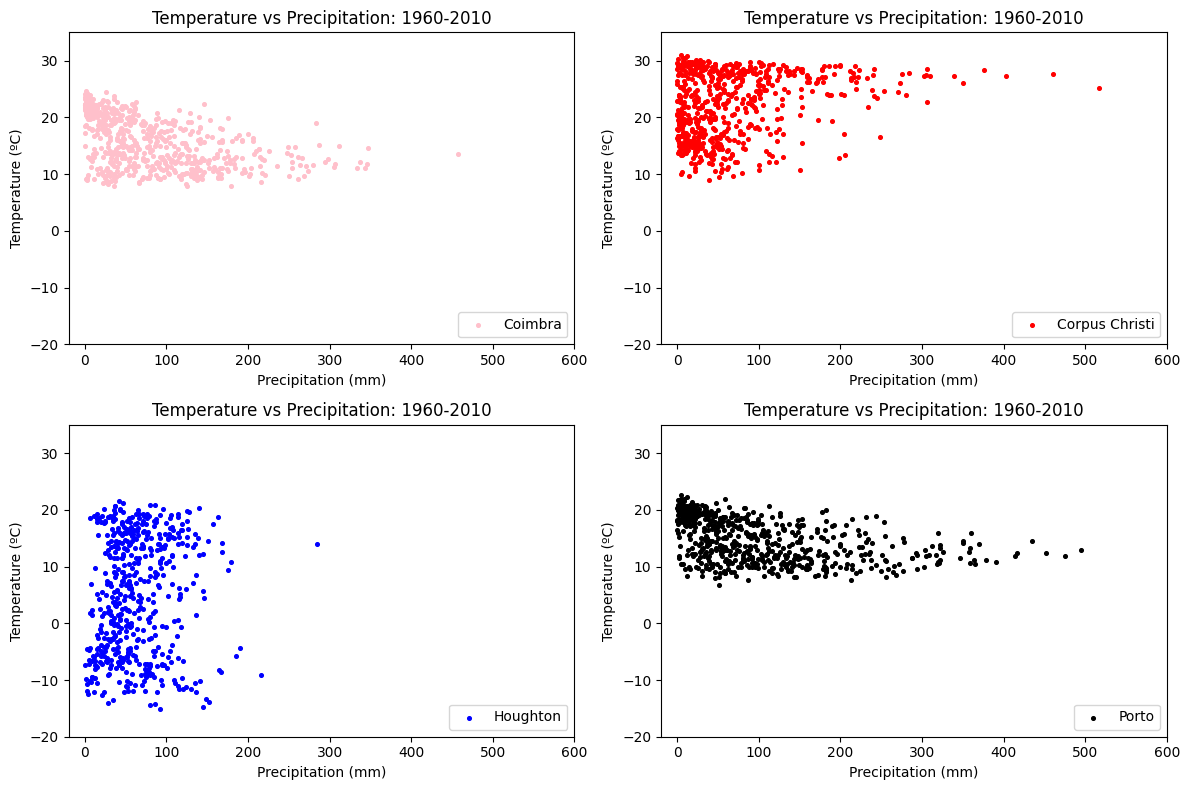

In [14]:
# create a scatter plot with temperature
# and precipitation data points
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(coimbra['PRCP'], coimbra['TAVG'], s=7, label='Coimbra', c='pink')
axs[0, 1].scatter(cctx['PRCP'], cctx['TAVG'], s=7, label='Corpus Christi', c='red')
axs[1, 0].scatter(houghton['PRCP'], houghton['TAVG'], c='blue', s=7, label='Houghton')
axs[1, 1].scatter(porto['PRCP'], porto['TAVG'], c='black', s=7, label='Porto')

# set ylim and xlim
for ax in axs.flatten():
  ax.set_ylim(-20, 35)
  ax.set_xlim(-20, 600)

# set legend, title, axes, and display plot
for i in range(2):
  for j in range(2):
    axs[i, j].set_title('Temperature vs Precipitation: 1960-2010')
    axs[i, j].set_xlabel('Precipitation (mm)')
    axs[i, j].set_ylabel('Temperature (ºC)')
    legend = axs[i, j].legend(loc='lower right')
    legend.get_frame().set_facecolor('white')

plt.tight_layout()
plt.show()

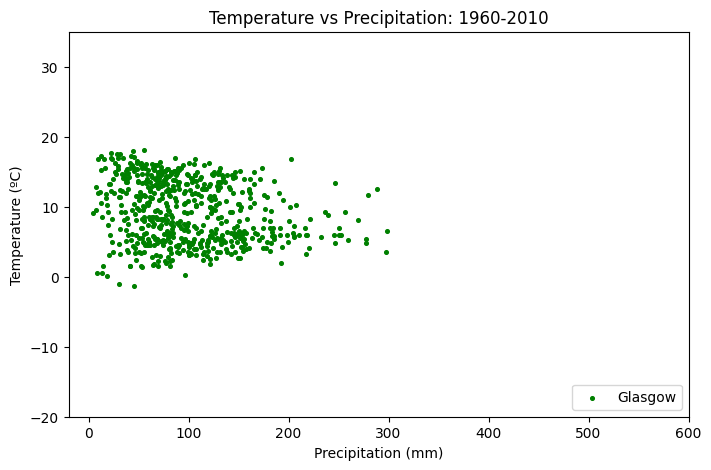

In [15]:
# create a scatter plot with temperature
# and precipitation data points
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(glasgow['PRCP'], glasgow['TAVG'], c='green', s=7, label='Glasgow')

# set legend, title, axes, and display plot
ax.set_title('Temperature vs Precipitation: 1960-2010')
ax.set_xlabel('Precipitation (mm)')
ax.set_ylabel('Temperature (ºC)')
ax.set_ylim(-20, 35)
ax.set_xlim(-20, 600)
legend = ax.legend(loc='lower right')
legend.get_frame().set_facecolor('white')

Pearson’s statistics were performed on the dataset and yielded the following person coefficients: -0.49, 0.25, -0.22, 0.11, and -0.45. Results suggest weak negative correlation between temperature and precipitation in European Cities, and weak positive correlation in American cities. Also, the small p values suggest that these results are statistically significant at the 0.05 confidence level. Therefore, the null hypothesis is re-jected as there is not enough information to suggest that correlation is non-existent. However, this does not guarantee causation as more scenarios have to be tested for such conclusion. One im-portant aspect to consider here is that Pearson’s does not work with NaN data points, therefore these have to be addressed before implementing this method. In this experiment, Glasgow data points that were removed during pre-processing for the Pearson’s test.

In [48]:
# calculate persons coefficient for correlation between precipitation and temperature
locations = [coimbra, cctx, glasgow, houghton, porto]
city = ['Coimbra', 'Corpus Christi', 'Glasgow', 'Houghton', 'Porto']

for loc, city in zip(locations, city):
  r = np.corrcoef(loc['PRCP'], loc['TAVG'])[0,1]
  print(city, 'Correlation Coefficient: ', r)

Coimbra Correlation Coefficient:  -0.4872896241443727
Corpus Christi Correlation Coefficient:  0.24541170140601848
Glasgow Correlation Coefficient:  nan
Houghton Correlation Coefficient:  0.11029255697653778
Porto Correlation Coefficient:  -0.4533615958513671
